In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

### kNN

In [2]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)


def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])

            test_distances.append((distance, y_train[i]))

        classes = {class_item: 0 for class_item in set(y_train)}

        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1 / (1 + d[0]) #ИЗМЕНЕНИЕ

        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers


def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [3]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [4]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.700


In [5]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.733


### k-means

In [6]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [39]:
def kmeans(data, k, max_iterations, min_distance):    

    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        clusters = {i: [] for i in range(k)}

        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)

        old_centroids = centroids.copy()

        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)

        optimal = True
        
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break

        if optimal:
            break
    
    return old_centroids, clusters

    
def mid_squar_dist(data, clusters, centroids):  
    
    mid_dist = 0    
    
    for cluster in clusters:        
        dist = 0           
        for x in clusters[cluster]:
            dist += np.square(e_metrics(x, centroids[cluster]))
            
        mid_dist += dist / len(clusters[cluster])
    
    return mid_dist

In [16]:
X, y = make_blobs(n_samples=100, random_state=1)

In [17]:
max_iterations = 10
min_distance = 1e-4

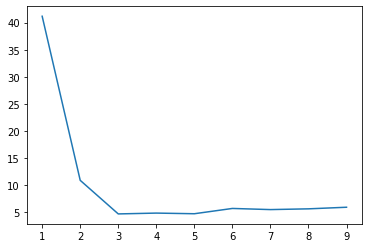

In [42]:
distances = []

for k in range(1, 10):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    
    distances.append(mid_squar_dist(X, clusters, centroids))

plt.plot(range(1, 10), distances)